In [67]:
import pandas as pd
import matplotlib
from matplotlib import dates as d
import datetime as dt
from datetime import timedelta
from datetime import time
import matplotlib.pyplot as plt
import numpy as np

In [68]:
#filename = 'path to your file', all you need for csv
filename = 'C:\\Working_folder\Code\BoreHole_01042020-01062022_379.csv'
#for other formats
#sheetname = 'sheet where your data is located'
sheetname = 'Diurnal'
#skiprows = 'number of rows to skip at top of the file'
SkipRows = '1'
#index_col = 'column number where your datetimes are'
index_col = '1'
data = pd.read_csv(filename)


In [69]:
#Munge the Data

#print("Dataframe shape: ", data.shape)
#print("Dataframe index ", data.index)
h, d, y = 24, 365, 2
#print("%d hours/day * %d days/year * %d years = %d hours"%(h, d , y, h*d*y))
data['Time']=pd.to_datetime(data['DATE'])
data[['h','m']] = pd.DataFrame([(x.hour, x.minute) for x in data['Time']])
data['minute'] = (pd.to_datetime(data['h'].astype(str) + ':' + data['m'].astype(str), format='%H:%M'))
#          .dt.time)
print(type(data['Time'].iloc[1]))
print(pd.Timestamp.date(data['Time'].iloc[1]))
print(data.index.map)
print(data.dtypes)
GroupedData = data.groupby(['minute']).describe().unstack()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-04-01
<bound method Index.map of RangeIndex(start=0, stop=86103, step=1)>
DATE              object
MX1              float64
AVG1               int64
MN1              float64
MX2                int64
               ...      
ZERO               int64
Time      datetime64[ns]
h                  int64
m                  int64
minute    datetime64[ns]
Length: 67, dtype: object


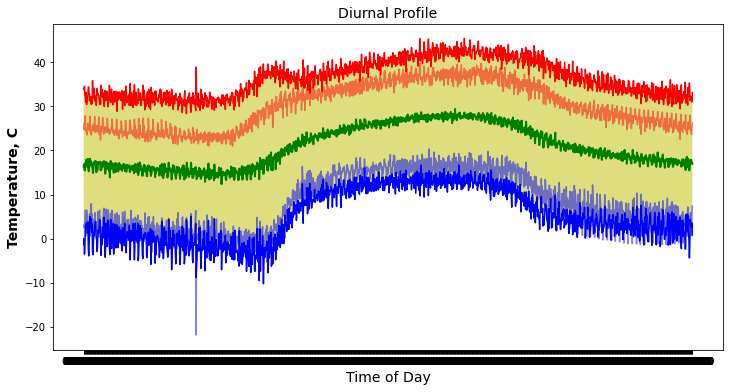

In [66]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.set_title('Diurnal Profile', fontsize=14)
ax.set_ylabel('Temperature, C', fontsize=14, weight='bold')
ax.set_xlabel('Time of Day', fontsize=14)
ax.plot(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['mean'], 'g', linewidth=2.0)
ax.plot(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['mean']+ GroupedData['TEMP']['std']*3, color='r')
ax.plot(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['mean']- GroupedData['TEMP']['std']*3, color='b')
ax.plot(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['min'], alpha=.5, color='b')
ax.plot(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['max'], alpha=.5, color='r')

ax.fill_between(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['mean'], GroupedData['TEMP']['mean']+GroupedData['TEMP']['std']*3, alpha=.5, facecolor='y')
ax.fill_between(GroupedData['TEMP']['mean'].index.astype(str), GroupedData['TEMP']['mean'], GroupedData['TEMP']['mean']-GroupedData['TEMP']['std']*3, alpha=.5, facecolor='y')

